In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound
import reboundx
import pandas as pd
%matplotlib inline

In [23]:
def simulation(P1, P2, gamma, pdot):
    mu1, mu2 = 36e-6, 28e-6
    ecc1, ecc0, ecc2 = 0.1, 0.1, 0.1
    pomega1, pomega0, pomega2 = -0.4, -0.86, 0
    P_0 = 0.05

    # start simulation
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun')

    # add star, planet 1, planet 2
    sim.add(m=1.)
    sim.add(m=mu1, P=P1, e=ecc1, pomega=pomega1)
    sim.add(m=mu2, P=P2, e=ecc2, pomega=pomega2)
    ps = sim.particles
    ps[1].r = ps[1].a*(ps[1].m/3/ps[0].m)**(1/3)
    ps[2].r = ps[2].a*(ps[2].m/3/ps[0].m)**(1/3)

    # add test particle
    sim.add(P=P_0, e=ecc0, pomega=pomega0)
    sim.move_to_com()
    sim.integrator = "whfast"
    sim.dt = sim.particles[1].P/20
    sim.collision = "direct"
    
    Nout=200
    pomega, ecc = np.zeros(Nout), np.zeros(Nout)
    times = np.linspace(0,1e5*P_0,Nout)
    
    rebx = reboundx.Extras(sim)
    cf = rebx.load_force("central_force")
    rebx.add_force(cf)
    
    ps[0].params["gammacentral"] = gamma
    ps[0].params["Acentral"] = pdot
#     pomegadot = pdot # has dimensions of inverse time, in whatever units the simulation uses.
#     ps[0].params["Acentral"] = rebx.central_force_Acentral(ps[3], ps[0], pomegadot, ps[0].params["gammacentral"])
    print(ps[0].params["Acentral"])
    
    for i, time in enumerate(times):
        try:
            sim.integrate(time)
            info = sim.particles[3].calculate_orbit(primary=sim.particles[0])
            pomega[i] = info.pomega
            ecc[i] = info.e
        except rebound.Collision:
            break

    pomega = pomega[pomega != 0]
    ecc = ecc[ecc != 0]
    times = times[0:len(ecc)]
    
    fig, axarr = plt.subplots(nrows=2, figsize=(12,8))
    axarr[0].plot(times, pomega, '.')
    axarr[0].set_ylabel(r"$\varpi$")
    axarr[1].plot(times, ecc, '.')
    axarr[1].hlines(ecc0,min(times),max(times))
    axarr[1].set_xlabel('time (yr)')
    axarr[1].set_ylabel('ecc')
    
    s = 0
    for val in ecc:
        s += (val-ecc0)**2
    print(f"sigma (1e-4) = {np.sqrt(s)/len(ecc)*1e4}")

-0.5
sigma (1e-4) = 3.8005698710942935


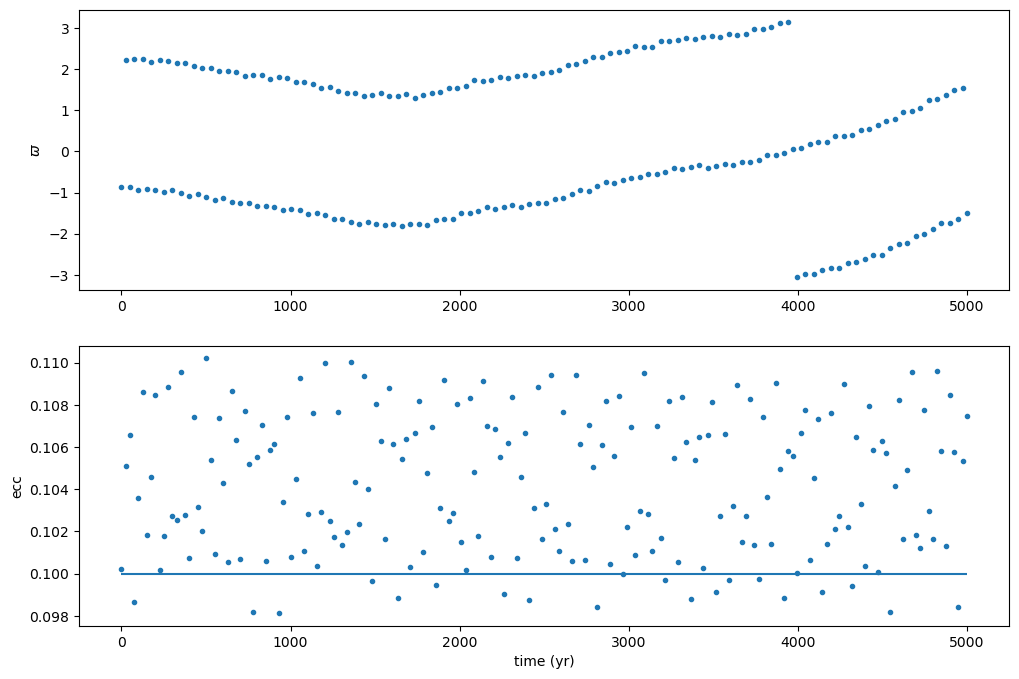

In [24]:
simulation(0.05*0.735, 0.05*1.55, -3, -0.5)

In [29]:
def simulation(param):
    P1, P2 = param
    ecc1, ecc0, ecc2 = 0.01, 0.01, 0.01
    mu1, mu2 = 36e-6, 28e-6
    pomega1, pomega0, pomega2 = -0.4, -0.86, 0
    P_0, lambda_0 = 0.05, 0

    # start simulation
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun')

    # add star, planet 1, planet 2
    sim.add(m=1.)
    sim.add(m=mu1, P=P1, e=ecc1, pomega=pomega1)
    sim.add(m=mu2, P=P2, e=ecc2, pomega=pomega2)
    ps = sim.particles
    ps[1].r = ps[1].a*(ps[1].m/3/ps[0].m)**(1/3)
    ps[2].r = ps[2].a*(ps[2].m/3/ps[0].m)**(1/3)
    
    # add test particle
    sim.add(P=P_0, l=lambda_0, e=ecc0, pomega=pomega0)
    sim.move_to_com()
    sim.integrator = "whfast"
    sim.dt = sim.particles[1].P/20
    sim.collision = "direct"
    
    pomega, ecc = np.zeros(200), np.zeros(200)
    # calculate megno
    times = np.logspace(0,5,num=200)*P_0
    for i, time in enumerate(times):
        try:
            sim.integrate(time)
            info = sim.particles[3].calculate_orbit(primary=sim.particles[0])
            pomega[i] = info.pomega
            ecc[i] = info.e
        except rebound.Collision:
            break

    pomega = pomega[pomega != 0]
    ecc = ecc[ecc != 0]
    times = times[0:len(ecc)]
    
    fig, axarr = plt.subplots(nrows=2, figsize=(12,8))
    axarr[0].plot(times, pomega, '.')
    axarr[0].set_ylabel(r"$\varpi$")
    axarr[1].plot(times, ecc, '.')
    axarr[1].hlines(ecc0,min(times),max(times))
    axarr[1].set_xlabel('time (yr)')
    axarr[1].set_ylabel('ecc')

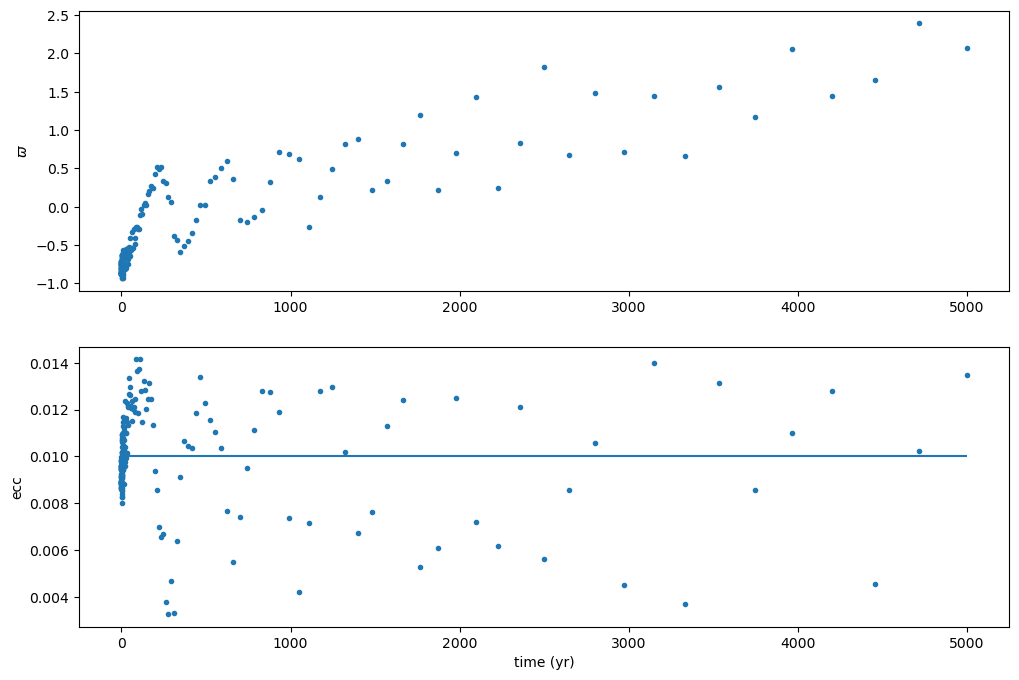

In [30]:
simulation((0.05*0.65, 0.05*1.55))